In [5]:
import pandas as pd
import gdown
import numpy as np
import matplotlib as mpl
import seaborn as sns
import altair as alt
import re # regular expression

# Install Data and Read File

In [6]:
# Download File to Colab
url1 = 'https://drive.google.com/uc?id=1soXeATn1SzQGxgtTimreV0xvWtl4Xxu3'
output1 = 'my_file1.csv'
gdown.download(url1, output1, quiet = False)

url2 = 'https://drive.google.com/file/d/1J27g-g1GN8GWuZdeg8VdvLln8BvE4Qvg'
output2 = 'my_file2.csv'
gdown.download(url2, output2, quiet = False)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1soXeATn1SzQGxgtTimreV0xvWtl4Xxu3

but Gdown can't. Please check connections and permissions.

In [7]:
df1 = pd.read_csv('my_file1.csv')  # Traffy_case

In [8]:
df2 = pd.read_csv('/content/Log_from_2022-05-22_to_2024-12-11.csv')  # Log_from

In [9]:
# Download Font (For plot)
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [10]:
df1.head()

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count
0,2024-6UUBZ2,เสียง,"เขตบางพลัด, กรุงเทพมหานคร",เพื่อนบ้านเปิดเพลงเสียงดังรบกวนผ่านเครื่องขยาย...,"100.49996,13.79136",https://storage.googleapis.com/traffy_public_b...,NaN,155 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...,บางพลัด,บางพลัด,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:22,0.0
1,2024-CYP76V,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/7ใ...,"100.5263,13.70647",https://storage.googleapis.com/traffy_public_b...,NaN,308 ถ. จันทน์ แขวงทุ่งวัดดอน เขตสาทร กรุงเทพมห...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:14,0.0
2,2024-8U78XH,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",จัดงานตลาดนัด จัดระเบียบได้ดีให้รถมอเตอร์ไซค์เ...,"100.52758,13.70599",https://storage.googleapis.com/traffy_public_b...,NaN,1928/3 ซอย จันทน์ 23/2 แขวงทุ่งวัดดอน เขตสาทร ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:09:51,0.0
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555",ปัญหา: บริเวณหน้าบ้านเลขที่ดังกล่าว พบผู้อาศัย...,"100.44078,13.68686",https://storage.googleapis.com/traffy_public_b...,NaN,10/101 ซอย เอกชัย 46 แขวงคลองบางพราน เขตบางบอน...,คลองบางพราน,บางบอน,กรุงเทพมหานคร,forward,NaN,0.0,2024-12-11 20:09:11,0.0
4,2024-78EH2R,อื่นๆ,"เขตราชเทวี, กรุงเทพมหานคร",จอด,"100.53401,13.75657",https://storage.googleapis.com/traffy_public_b...,NaN,BTS Phaya Thai Phaya Thai Road Thanon Phaya Th...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:08:41,0.0


In [11]:
df1.columns

Index(['ticket_id', 'type', 'organization_action', 'comment', 'coords',
       'photo', 'photo_after', 'address', 'subdistrict', 'district',
       'province', 'state', 'star', 'count_reopen', 'last_activity',
       'view_count'],
      dtype='object')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772938 entries, 0 to 772937
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ticket_id            772938 non-null  object 
 1   type                 772937 non-null  object 
 2   organization_action  772937 non-null  object 
 3   comment              772937 non-null  object 
 4   coords               772935 non-null  object 
 5   photo                772838 non-null  object 
 6   photo_after          614548 non-null  object 
 7   address              772935 non-null  object 
 8   subdistrict          772495 non-null  object 
 9   district             772492 non-null  object 
 10  province             772866 non-null  object 
 11  state                772935 non-null  object 
 12  star                 263926 non-null  float64
 13  count_reopen         772933 non-null  float64
 14  last_activity        772931 non-null  object 
 15  view_count       

In [13]:
# Top 10 of problems
import matplotlib.pyplot as plt

# นับจำนวนปัญหาแต่ละประเภท
problem_counts = df1['type'].value_counts()

# แสดง 10 อันดับปัญหาที่พบบ่อยที่สุด
print(problem_counts.head(10))

type
อื่นๆ                    139954
ทางเท้า                  111340
ผิดกฎจราจร                50578
จุดเสี่ยง,ความปลอดภัย     45064
ถนน,ผิดกฎจราจร            36226
อื่นๆ,ไฟฟ้า               33249
ถนน                       32237
ไฟฟ้า                     24270
ขยะ,ความสะอาด             22565
น้ำท่วม                   21558
Name: count, dtype: int64


In [14]:
problem_counts

,count
type,
อื่นๆ,139954
ทางเท้า,111340
ผิดกฎจราจร,50578
"จุดเสี่ยง,ความปลอดภัย",45064
"ถนน,ผิดกฎจราจร",36226
...,...
"ขยะ,ความสะอาด,หาบเร่แผงลอย",1
"อื่นๆ,ขอใช้บริการ,หาบเร่แผงลอย",1
"ไฟฟ้า,ทุจริต,จุดเสี่ยง,ความปลอดภัย",1


In [15]:
# Counting new category (some row have more than one type)
problem_counts_unique = df1['type'].str.split(',').explode().value_counts()

# Change all data to english
problem_counts_unique

,count
type,
อื่นๆ,249780
ผิดกฎจราจร,123859
ทางเท้า,121285
ความปลอดภัย,86703
ถนน,81105
...,...
ขอทุน,1
Public Event ขออนุญาตจัดกิจกรรม,1
IT & Internet,1


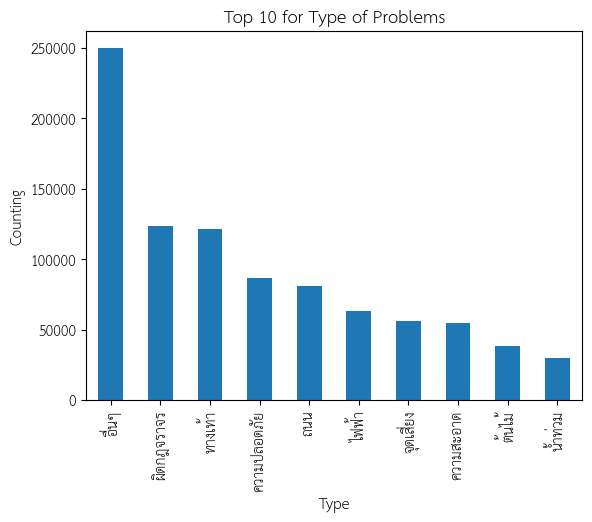

type
อื่นๆ          249780
ผิดกฎจราจร     123859
ทางเท้า        121285
ความปลอดภัย     86703
ถนน             81105
ไฟฟ้า           63511
จุดเสี่ยง       56051
ความสะอาด       54820
ต้นไม้          38499
น้ำท่วม         30286
Name: count, dtype: int64


In [16]:
# สร้างกราฟแท่งแสดงจำนวนปัญหาแต่ละประเภท
problem_counts_unique.head(10).plot(kind='bar')
plt.title('Top 10 for Type of Problems')
plt.xlabel('Type')
plt.ylabel('Counting')
plt.show()

print(problem_counts_unique.head(10))

In [17]:
# แยกหน่วยงานที่รับผิดชอบจากคอลัมน์ organization_action
all_organizations = df1['organization_action'].str.split(', ').explode()

# นับจำนวนครั้งที่แต่ละหน่วยงานแก้ไขปัญหา
organization_counts = all_organizations.value_counts()[1:,]

In [18]:
organization_counts

,count
organization_action,
เพื่อนชัชชาติ,532889
ร้องทุกข์ กทม. 1555,125294
สำนักการโยธา กทม.,102007
สำนักงานตำรวจแห่งชาติ (Royal Thai Police),80256
กองบัญชาการตำรวจนครบาล (บช.น.),80202
...,...
ฝ่ายเทศกิจ สำนักงานเขตบางกอกใหญ่ กรุงเทพมหานคร (SoSafe),1
ศูนย์ถ่ายทำภาพยนตร์ เขตป้อมปราบศัตรูพ่าย,1
วชิรวุฒิ,1


In [19]:
# แสดง 10 อันดับหน่วยงานที่แก้ไขปัญหามากที่สุด
print(organization_counts.head(10))

organization_action
เพื่อนชัชชาติ                                 532889
ร้องทุกข์ กทม. 1555                           125294
สำนักการโยธา กทม.                             102007
สำนักงานตำรวจแห่งชาติ (Royal Thai Police)      80256
กองบัญชาการตำรวจนครบาล (บช.น.)                 80202
การไฟฟ้านครหลวง MEA                            60223
สำนักการจราจรและขนส่ง กรุงเทพมหานคร (สจส.)     41439
เขตจตุจักร                                     40899
กลุ่มกรุงเทพตะวันออก (นายณรงค์ เรืองศรี)       35293
กลุ่มกรุงเทพใต้ (นายชาตรี วัฒนเขจร)            34985
Name: count, dtype: int64


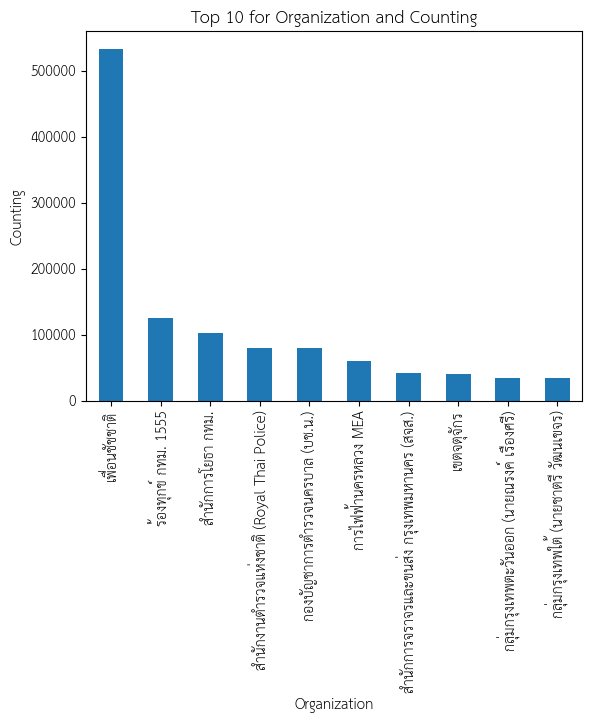

In [20]:
# สร้างกราฟแท่งแสดงจำนวนครั้งที่แต่ละหน่วยงานแก้ไขปัญหา
organization_counts.head(10).plot(kind='bar')
plt.title('Top 10 for Organization and Counting')
plt.xlabel('Organization')
plt.ylabel('Counting')
plt.show()

In [21]:
conditions = [
    df1['organization_action'].str.contains('เพื่อนชัชชาติ').fillna(False).astype(bool),
    df1['organization_action'].str.contains('ร้องทุกข์ กทม. 1555').fillna(False).astype(bool)
]
choices = ['Line', 'Call Center']
df1['organization_group'] = np.select(conditions, choices, default='หน่วยงานอื่นๆ')

<ipython-input-21-717985e727bb>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['organization_action'].str.contains('เพื่อนชัชชาติ').fillna(False).astype(bool),
<ipython-input-21-717985e727bb>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['organization_action'].str.contains('ร้องทุกข์ กทม. 1555').fillna(False).astype(bool)


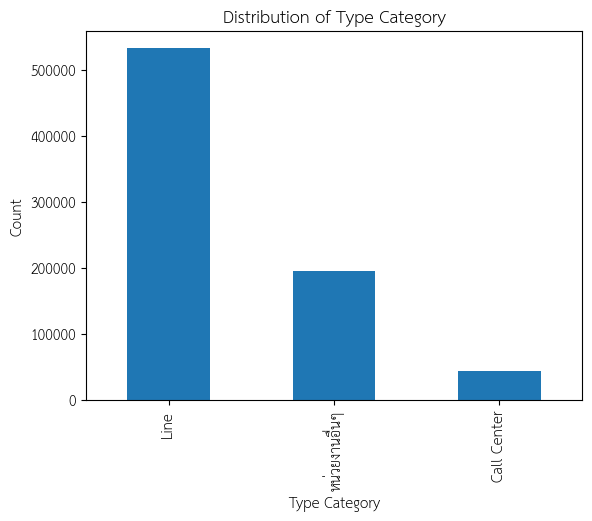

In [22]:
# plot the distribution of type_category
df1['organization_group'].value_counts().plot(kind='bar')
plt.title('Distribution of Type Category')
plt.xlabel('Type Category')
plt.ylabel('Count')
plt.show()

Are there difference in user behavior between contact channels?
How to better serve each group?

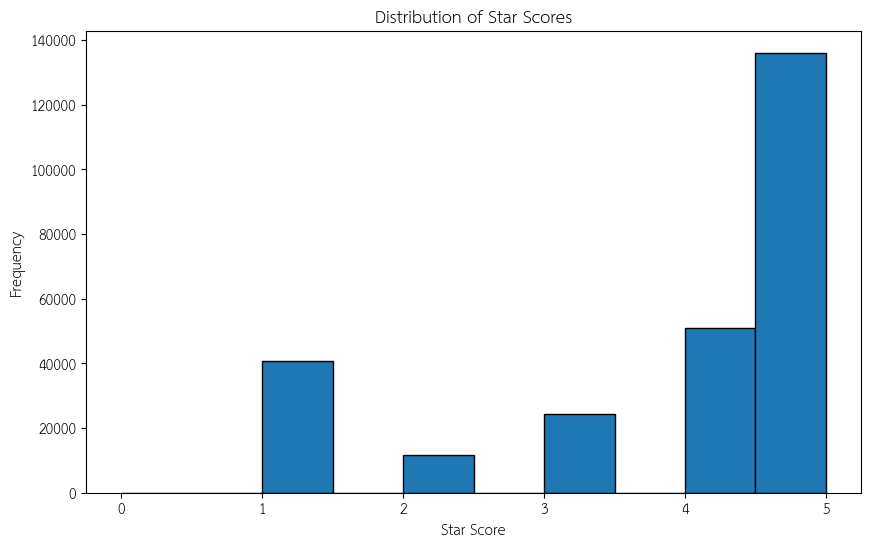

In [23]:
if 'star' in df1.columns:
    # Create the histogram
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.hist(df1['star'], bins=10, edgecolor='black')  # Adjust bins as needed
    plt.title('Distribution of Star Scores')
    plt.xlabel('Star Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Error: 'star_score' column not found in the DataFrame.")

In [24]:
# Group data by contact channel ('organization_group') and calculate descriptive statistics for relevant columns
grouped_data = df1.groupby('organization_group').agg({
    'star': ['mean', 'median', 'std', 'count'],  # Star ratings
    # Add other columns like 'type', 'time_taken', etc. as needed
    'type': lambda x: x.value_counts().index[0]  #Most Frequent problem type
})

In [25]:
print(grouped_data)

                        star                              type
                        mean median       std   count <lambda>
organization_group                                            
Call Center         3.848427    5.0  1.630055    2639    ไฟฟ้า
Line                3.852135    4.0  1.453591  195510    อื่นๆ
หน่วยงานอื่นๆ       3.924715    5.0  1.512110   65777      ถนน


<ipython-input-26-5bc68f030de1>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(xtick, means[xtick], marker='x', markersize=7, color='black')


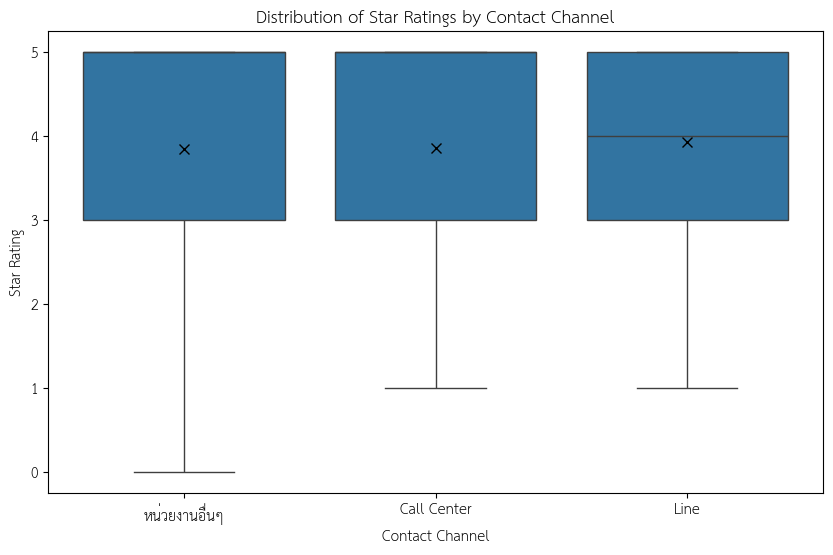

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Star Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='organization_group', y='star', data=df1)

# Calculate the mean for each group
means = df1.groupby('organization_group')['star'].mean()

# Add the mean markers to the plot
for xtick in range(len(means)):
    plt.plot(xtick, means[xtick], marker='x', markersize=7, color='black')


plt.title('Distribution of Star Ratings by Contact Channel')
plt.xlabel('Contact Channel')
plt.ylabel('Star Rating')
plt.show()

In [27]:
# prompt: From the boxplot, write the insight to see (not long around 3 bullet 1 bullet = 1 sentence)

* Users who contacted through the "Call Center" channel provided a slightly wider range of star ratings compared to other channels.
* The median star rating for users contacting via "Line" appears to be slightly higher than those using "Call Center".
* There's a noticeable difference in the distribution of star ratings between the contact channels, suggesting potential differences in user satisfaction.


SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-27-d0e1005d3857>, line 5)

In [28]:
grouped_contact_problems = df1.groupby('organization_group')['type'].apply(lambda x: x.str.split(',').explode().value_counts().reindex(problem_counts_unique.index, fill_value=0))

In [29]:
grouped_contact_problems

organization_group  type                           
Call Center         อื่นๆ                              7153
                    ผิดกฎจราจร                         3376
                    ทางเท้า                            3149
                    ความปลอดภัย                           6
                    ถนน                                3544
                                                       ... 
หน่วยงานอื่นๆ       ขอทุน                                 1
                    Public Event ขออนุญาตจัดกิจกรรม       1
                    IT & Internet                         0
                    แผ่นดินไหว                            0
                    ดินโคลนถล่ม                           0
Name: type, Length: 240, dtype: int64

In [30]:
df1_summary = df1.groupby('organization_group')['star'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

In [31]:
df1_summary

,organization_group,mean,std,min,max,count
0,Call Center,3.848427,1.630055,1.0,5.0,2639
1,Line,3.852135,1.453591,1.0,5.0,195510
2,หน่วยงานอื่นๆ,3.924715,1.512110,0.0,5.0,65777


In [32]:
merged_df = pd.merge(df1, df2, on='ticket_id', how='inner')

“ปัญหาที่ได้ยินบ่อยในไลฟ์ผู้ว่าชัชชาติคือ ถนนและทางเท้าพัง น่าจะถูกร้องเรียนเป็นอันดับต้นๆ และ น่าจะเป็นเหมือนกันในแต่ละเขต” เราจึงทำการหาข้อมูลเกี่ยวกับภาพรวมของปัญหาก่อนว่ามีปัญหาอะไรบ้าง อัตราส่วนแต่ละปัญหาเป็นอย่างไร?

In [33]:
# prompt: use merged_df to answer the hypothesis: "““ปัญหาที่ได้ยินบ่อยในไลฟ์ผู้ว่าชัชชาติคือ ถนนและทางเท้าพัง น่าจะถูกร้องเรียนเป็นอันดับต้นๆ และ น่าจะเป็นเหมือนกันในแต่ละเขต” เราจึงทำการหาข้อมูลเกี่ยวกับภาพรวมของปัญหาก่อนว่ามีปัญหาอะไรบ้าง อัตราส่วนแต่ละปัญหาเป็นอย่างไร?”" (use only merge_df to write code)

# Display the top 10 most frequent problems from the merged dataframe.
top_problems = merged_df['type'].value_counts().head(10)
print(top_problems)

# Analyze problem distribution across districts in the merged dataframe.
district_problems = merged_df.groupby('district')['type'].value_counts().unstack(fill_value=0)
district_problems

type
อื่นๆ                    366255
ทางเท้า                  305830
ผิดกฎจราจร               122170
จุดเสี่ยง,ความปลอดภัย    115484
ถนน,ผิดกฎจราจร            96952
อื่นๆ,ไฟฟ้า               89569
ถนน                       78279
ขยะ,ความสะอาด             64319
ฝุ่นควัน&กลิ่น&PM2.5      61031
ไฟฟ้า                     60780
Name: count, dtype: int64


type,กรุงเทพโปร่งใส,ขยะ,"ขยะ,คนเร่ร่อน,ความสะอาด","ขยะ,ควันดำ,ความสะอาด","ขยะ,ความสะอาด","ขยะ,ความสะอาด,ขอความช่วยเหลือ","ขยะ,ความสะอาด,ขอใช้บริการ","ขยะ,ความสะอาด,จุดเสี่ยง","ขยะ,ความสะอาด,ผิดกฎจราจร","ขยะ,ความสะอาด,ฝุ่นควัน&กลิ่น&PM2.5",...,"ไฟฟ้า,อุบัติเหตุ","ไฟฟ้า,อุปกรณ์ชำรุด","ไฟฟ้า,อุปกรณ์ชำรุด,ฝุ่นควัน&กลิ่น&PM2.5","ไฟฟ้า,เผาในที่โล่ง","ไฟฟ้า,เสนอแนะ","ไฟฟ้า,เสนอแนะ,ประชาสัมพันธ์","ไฟฟ้า,เสนอแนะ,ผิดกฎจราจร","ไฟฟ้า,แท็กซี่/รถเมล์","ไฟฟ้า,โรงเรียน","ไฟฟ้า,ไฟฟ้า/แสงสว่าง"
district,,,,,,,,,,,,,,,,,,,,,
กระทุ่มแบน,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
กะทู้,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
กันทรลักษ์,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ขามทะเลสอ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ครบุรี,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
โชคชัย,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
โพธาราม,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
โพนพิสัย,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Show column name of merged_df
merged_df.columns

Index(['ticket_id', 'type', 'organization_action', 'comment', 'coords',
       'photo', 'photo_after', 'address', 'subdistrict', 'district',
       'province', 'state_x', 'star', 'count_reopen', 'last_activity',
       'view_count', 'organization_group', 'state_y', 'timestamp'],
      dtype='object')

In [35]:
# prompt: ตรวจสอบช่วงเวลาในการร้องทุกข์ของคน ใช้ตาราง merged ในการแบ่งกลุ่ม organization-group และ timestamp ของ state = reported

# Assuming 'merged_df' is your merged DataFrame
reported_cases = merged_df[merged_df['state_y'] == 'reported']

In [36]:
reported_cases

,ticket_id,type,organization_action,comment,coords,photo,photo_after,address,subdistrict,district,province,state_x,star,count_reopen,last_activity,view_count,organization_group,state_y,timestamp
0,2024-6UUBZ2,เสียง,"เขตบางพลัด, กรุงเทพมหานคร",เพื่อนบ้านเปิดเพลงเสียงดังรบกวนผ่านเครื่องขยาย...,"100.49996,13.79136",https://storage.googleapis.com/traffy_public_b...,NaN,155 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...,บางพลัด,บางพลัด,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:22,0.0,หน่วยงานอื่นๆ,reported,2024-12-11 20:14:18
1,2024-CYP76V,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",เรียนท่านผู้ว่าก.ท.ม\nถึงก่อนปากซอยจันทร์18/7ใ...,"100.5263,13.70647",https://storage.googleapis.com/traffy_public_b...,NaN,308 ถ. จันทน์ แขวงทุ่งวัดดอน เขตสาทร กรุงเทพมห...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:14:14,0.0,หน่วยงานอื่นๆ,reported,2024-12-11 20:14:08
2,2024-8U78XH,ผิดกฎจราจร,"เขตสาทร, กรุงเทพมหานคร",จัดงานตลาดนัด จัดระเบียบได้ดีให้รถมอเตอร์ไซค์เ...,"100.52758,13.70599",https://storage.googleapis.com/traffy_public_b...,NaN,1928/3 ซอย จันทน์ 23/2 แขวงทุ่งวัดดอน เขตสาทร ...,ทุ่งวัดดอน,สาทร,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:09:51,0.0,หน่วยงานอื่นๆ,reported,2024-12-11 20:09:46
3,RXTPAP,ฝุ่นควัน&กลิ่น&PM2.5,"เขตบางบอน, กรุงเทพมหานคร, ร้องทุกข์ กทม. 1555",ปัญหา: บริเวณหน้าบ้านเลขที่ดังกล่าว พบผู้อาศัย...,"100.44078,13.68686",https://storage.googleapis.com/traffy_public_b...,NaN,10/101 ซอย เอกชัย 46 แขวงคลองบางพราน เขตบางบอน...,คลองบางพราน,บางบอน,กรุงเทพมหานคร,forward,NaN,0.0,2024-12-11 20:09:11,0.0,Call Center,reported,2024-12-11 20:09:08
4,2024-78EH2R,อื่นๆ,"เขตราชเทวี, กรุงเทพมหานคร",จอด,"100.53401,13.75657",https://storage.googleapis.com/traffy_public_b...,NaN,BTS Phaya Thai Phaya Thai Road Thanon Phaya Th...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,start,NaN,0.0,2024-12-11 20:08:41,0.0,หน่วยงานอื่นๆ,reported,2024-12-11 20:08:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035012,2022-K3TZH9,"ขยะ,ความสะอาด","เขตภาษีเจริญ, ฝ่ายรักษาความสะอาดฯ เขตภาษีเจริญ...",ขยะถูกกองเอามาทิ้งหน้าซอย สกปรกมากครับ,"100.42759,13.7122",https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,743 ถ. เพชรเกษม แขวง บางหว้า เขตภาษีเจริญ กรุง...,บางหว้า,ภาษีเจริญ,กรุงเทพมหานคร,finish,NaN,0.0,2024-03-06 13:21:36,0.0,Line,reported,2022-05-22 22:04:22
2035014,2022-EZ6KZT,อื่นๆ,"เขตบางคอแหลม, เพื่อนชัชชาติ, กรุงเทพมหานคร",ไม่แสดงรายละเอียด,"100.53009,13.70223",https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,197/8 ถ. สาธุประดิษฐ์ แขวง ช่องนนทรี เขต ยานนา...,บางโคล่,บางคอแหลม,กรุงเทพมหานคร,irrelevant,NaN,0.0,2024-03-05 19:59:40,0.0,Line,reported,2022-05-22 21:14:51
2035016,2022-AZ7TPX,"อื่นๆ,ทางเท้า","สำนักการโยธา กทม., ฝ่ายโยธา เขตบางแค, ศูนย์ก่อ...",https://goo.gl/maps/dhTVDmWhW2ArbX826,"100.41362,13.69212",https://storage.googleapis.com/traffy_public_b...,NaN,44/2 หมู่ที่ 3 ถนนสุขาภิบาล 1 แขวงบางแค เขตบาง...,บางแค,บางแค,กรุงเทพมหานคร,inprogress,NaN,0.0,2024-07-10 09:20:25,0.0,Line,reported,2022-05-22 20:00:17
2035018,2022-6E7ANR,อื่นๆ,"เขตราษฎร์บูรณะ, เพื่อนชัชชาติ, กรุงเทพมหานคร",ในซอยไม่มีทางเท้า มีการสร้างสิ่งปลูกสร้างทับคูน้ำ,"100.49442,13.67398",https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,249 ซอย อนามัย แขวง บางปะกอก เขตราษฎร์บูรณะ กร...,บางปะกอก,ราษฎร์บูรณะ,กรุงเทพมหานคร,finish,3.0,0.0,2024-03-06 09:34:04,0.0,Line,reported,2022-05-22 19:42:18


<ipython-input-37-a5fe5bd9d9bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reported_cases['timestamp'] = pd.to_datetime(reported_cases['timestamp'])
<ipython-input-37-a5fe5bd9d9bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reported_cases['hour'] = reported_cases['timestamp'].dt.hour


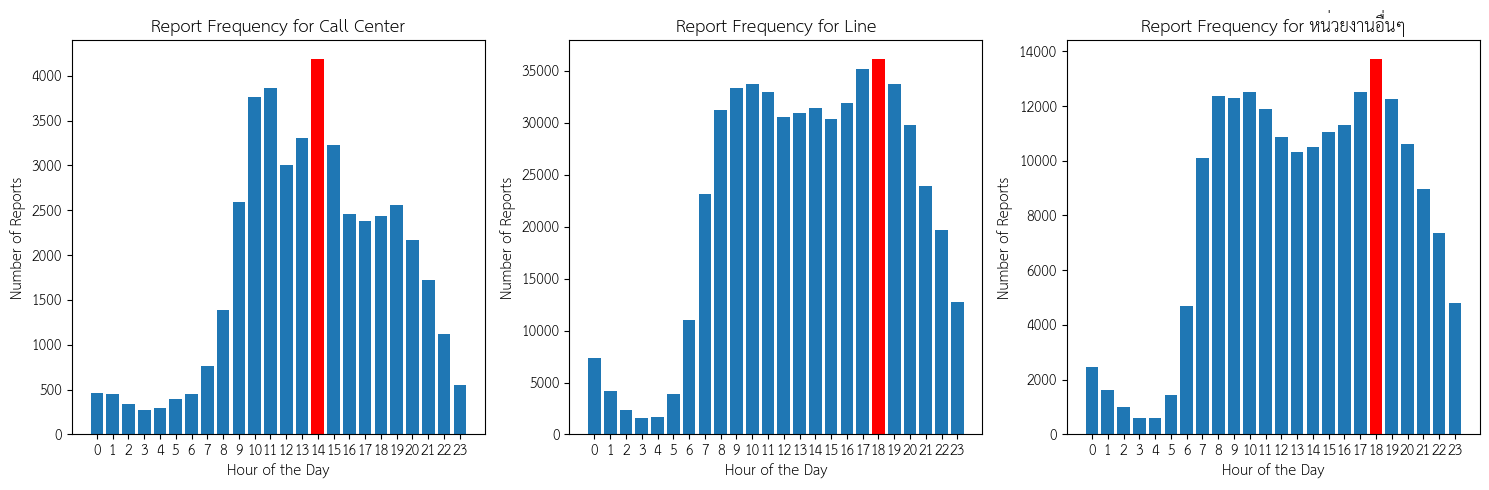

In [37]:
reported_cases = merged_df[merged_df['state_y'] == 'reported']

# Convert the 'timestamp' column to datetime objects if it's not already.
reported_cases['timestamp'] = pd.to_datetime(reported_cases['timestamp'])

# Extract the hour from the timestamp
reported_cases['hour'] = reported_cases['timestamp'].dt.hour

# Group by 'organization_group' and 'hour' and count occurrences.
hourly_counts = reported_cases.groupby(['organization_group', 'hour']).size().reset_index(name='counts')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Define organization groups
organization_groups = hourly_counts['organization_group'].unique()

# Iterate through organization groups and plot
for i, org_group in enumerate(organization_groups):
    if i < 3 : # plot only first 3 organization
        org_data = hourly_counts[hourly_counts['organization_group'] == org_group]
        max_hour = org_data.loc[org_data['counts'].idxmax(), 'hour']
        max_count = org_data['counts'].max()

        axes[i].bar(org_data['hour'], org_data['counts'])
        axes[i].bar(max_hour, max_count, color='red') # Highlight the highest bar
        axes[i].set_title(f'Report Frequency for {org_group} (Mode at {max_hour} hour)')
        axes[i].set_xticks(range(24))
        axes[i].set_xlabel('Hour of the Day')
        axes[i].set_ylabel('Number of Reports')
        axes[i].set_title(f'Report Frequency for {org_group}')
        axes[i].set_xticks(range(24)) # set x ticks to hours 0-23

plt.tight_layout()
plt.show()

In [38]:
# Sample 40% of the data
sampled_df = merged_df.sample(frac=0.4, random_state=42)  # Use random_state for reproducibility

# Filter for 'reported' and 'finish' states
reported_times = sampled_df[sampled_df['state_y'] == 'reported'].copy()
finish_times = sampled_df[sampled_df['state_y'] == 'finish'].copy()

# Convert timestamps to datetime objects
reported_times['timestamp'] = pd.to_datetime(reported_times['timestamp'])
finish_times['timestamp'] = pd.to_datetime(finish_times['timestamp'])

# Merge the two dataframes on 'ticket_id'
merged_times = pd.merge(reported_times, finish_times, on='ticket_id', suffixes=('_reported', '_finish'))

# Calculate the time difference
merged_times['time_diff'] = merged_times['timestamp_finish'] - merged_times['timestamp_reported']

# Convert time difference to a numerical representation (e.g., seconds)
merged_times['time_diff_seconds'] = merged_times['time_diff'].dt.total_seconds()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_times['timestamp_reported'], merged_times['time_diff_seconds'])
plt.xlabel('Reported Time')
plt.ylabel('Time to Process (seconds)')
plt.title('Time Duration to Process Issues')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7886e2a5d1b0> (for post_execute):


KeyboardInterrupt: 

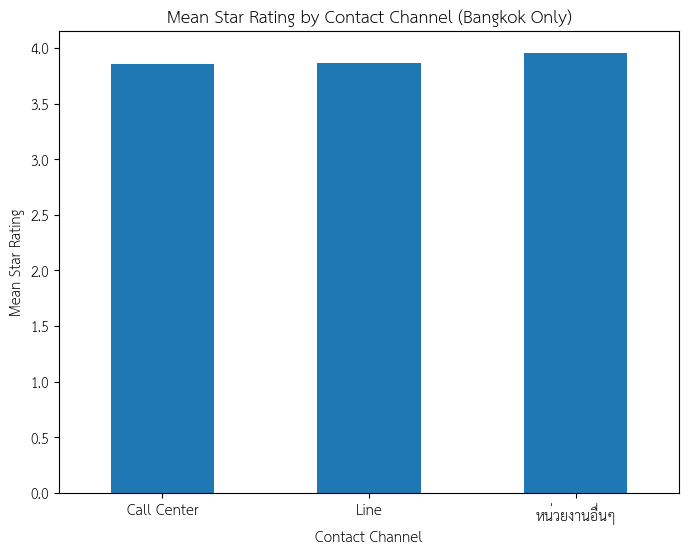


Further Analysis for Bangkok:

Problem Distribution in Bangkok:
 organization_group  type                            
Call Center         ไฟฟ้า                               0.147892
                    อื่นๆ                               0.132488
                    เสียง                               0.094338
                    ความสะอาด                           0.086933
                    ถนน                                 0.071813
                                                          ...   
หน่วยงานอื่นๆ       อื่นๆ,ผู้พิการ+ใช้ล้อ,สายสื่อสาร    0.000002
                    อื่นๆ,เสียง,ภัยออนไลน์              0.000002
                    อุบัติเหตุ,อาคารสถานที่ชำรุด        0.000002
                    แท็กซี่/รถเมล์,อาคารสถานที่ชำรุด    0.000002
                    ไฟฟ้า,ภัยออนไลน์                    0.000002
Name: proportion, Length: 1417, dtype: float64


KeyError: 'Column not found: time_diff_seconds'

In [42]:
# prompt: plot moreover, If can show an insight (show only in bankok) (use organization_action to see province, don't have province column or distinct), and to answer  Are there difference in user behavior between contact channels?
# How to better serve each group?

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it contains 'organization_action' column
# and you've already performed the necessary data processing steps.

# Filter data for Bangkok (assuming 'organization_action' contains province information)
bangkok_data = merged_df[merged_df['organization_action'].str.contains('กรุงเทพมหานคร', na=False)]

# Group data by contact channel and calculate mean star rating for Bangkok
grouped_bangkok_data = bangkok_data.groupby('organization_group')['star'].mean()

# Create a bar plot of mean star rating by contact channel for Bangkok
plt.figure(figsize=(8, 6))
grouped_bangkok_data.plot(kind='bar')
plt.title('Mean Star Rating by Contact Channel (Bangkok Only)')
plt.xlabel('Contact Channel')
plt.ylabel('Mean Star Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Further analysis for Bangkok data
print("\nFurther Analysis for Bangkok:")

# Problem distribution in Bangkok by contact channel
bangkok_problems = bangkok_data.groupby('organization_group')['type'].value_counts(normalize=True)
print("\nProblem Distribution in Bangkok:\n", bangkok_problems)


# Calculate response time statistics for Bangkok by contact channel
# Assuming 'time_diff_seconds' is calculated as shown in the previous code
bangkok_response_times = bangkok_data.groupby('organization_group')['time_diff_seconds'].agg(['mean', 'median', 'std'])
print("\nResponse Time Statistics in Bangkok:\n", bangkok_response_times)

# Insights and Recommendations (example)
print("\nInsights and Recommendations for Bangkok:")
if grouped_bangkok_data['Call Center'] < grouped_bangkok_data['Line']:
    print("- Users contacting via Line in Bangkok seem more satisfied than users contacting via Call Center.")
    print("- Investigate reasons for lower satisfaction through Call Center in Bangkok.  Review call center procedures, agent training, and overall service quality.")
    print("- Consider enhancing Call Center service offerings, perhaps through personalized service or improved issue resolution.")
elif grouped_bangkok_data['Call Center'] > grouped_bangkok_data['Line']:
  print("- Users contacting via Call Center in Bangkok seem more satisfied than users contacting via Line.")
  print("- Investigate reasons for lower satisfaction through Line in Bangkok. Review chatbot response, or response time.")
  print("- Consider enhancing Line service offerings, perhaps through direct help with an agent, or FAQ.")

print("- Analyze the most frequent problems for each contact channel in Bangkok to tailor service improvement efforts.")
print("- Further analysis of response times may reveal bottlenecks in service delivery for specific channels.")

<ipython-input-58-fd0f058ec572>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].bar(problem_counts.index[j], ratios[j], color=highlight_colors[j])
<ipython-input-58-fd0f058ec572>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].bar(problem_counts.index[j], ratios[j], color=highlight_colors[j])
<ipython-input-58-fd0f058ec572>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].bar(problem_counts.index[j], rat

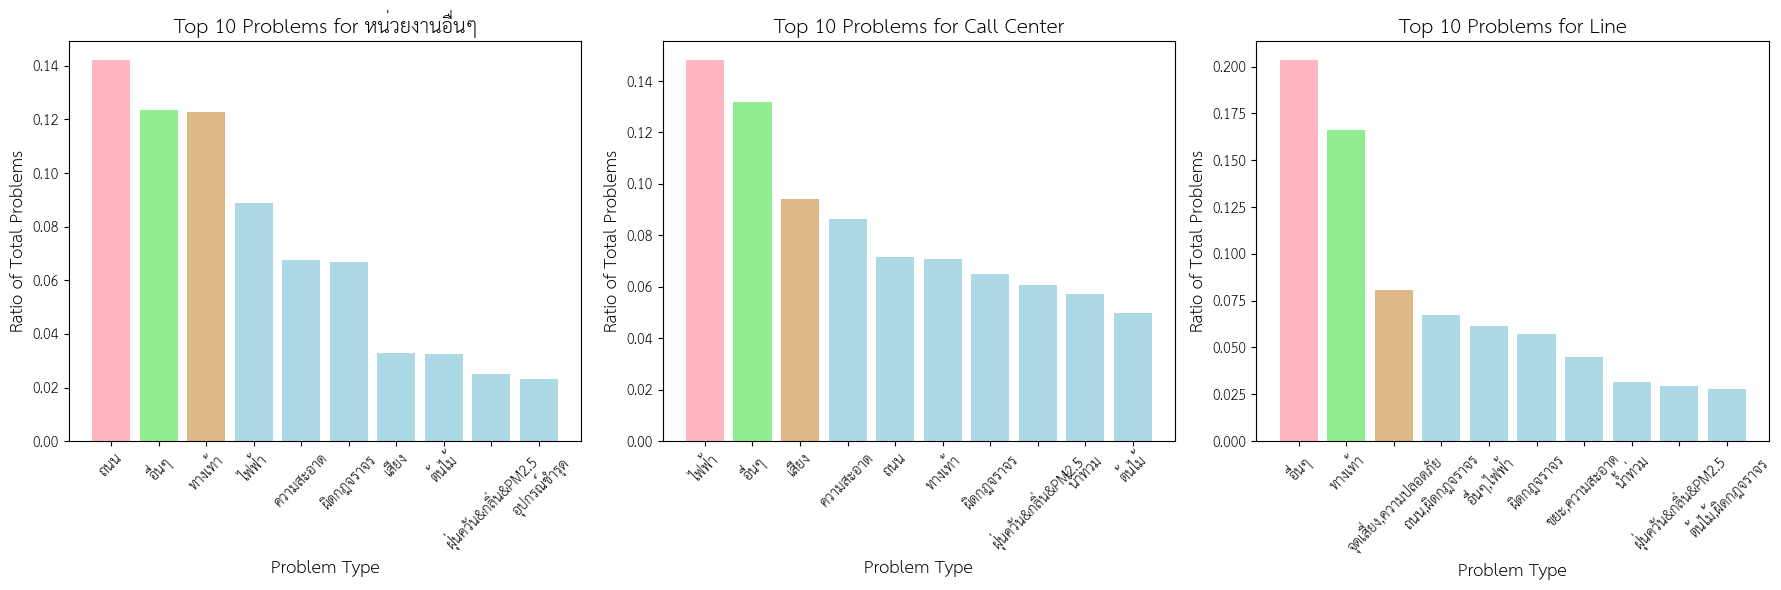

In [58]:
# prompt: 1. Plot 3 subplot, which represent the organization_group
# 2. for each subplot must show
#    - the top 10 problems with bar plot
#    - highlight the 3 biggest problems (that mean the top 3 highest bar, with red, green, brown pastel)
# plot via vertical
#    - show the ratio when compare the number of problem divieded with the total of problem (of each group)
# (have only merge_df, you will use this to plot)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'merged_df' is your DataFrame and it contains 'organization_group' and 'type' columns

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a color palette for highlighting
highlight_colors = ['#FFB6C1', '#90EE90', '#DEB887']

# Loop through each organization group
for i, org_group in enumerate(merged_df['organization_group'].unique()):
    if i < 3:  # Plot only the first 3 groups
        group_data = merged_df[merged_df['organization_group'] == org_group]
        problem_counts = group_data['type'].value_counts().head(10)

        # Calculate ratios
        total_problems = len(group_data)
        ratios = problem_counts / total_problems

        # Create the bar plot
        axes[i].bar(problem_counts.index, ratios, color='#ADD8E6') # Light Blue

        # Highlight the top 3 problems
        for j in range(min(3, len(problem_counts))):
            axes[i].bar(problem_counts.index[j], ratios[j], color=highlight_colors[j])

        axes[i].set_title(f'Top 10 Problems for {org_group}', fontsize = 14)
        axes[i].set_xlabel('Problem Type', fontsize = 12)
        axes[i].set_ylabel('Ratio of Total Problems', fontsize = 12)
        axes[i].tick_params(axis='x', rotation=45, labelsize = 10) # Rotates X-axis labels
        axes[i].tick_params(axis='y', labelsize = 10)

plt.tight_layout()
plt.show()